In [2]:
from rdkit import Chem

RDKit WARNING: [12:32:22] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
m = Chem.MolFromSmiles('c1c(nc[nH]1)C[C@@H](C(=O)O)N')

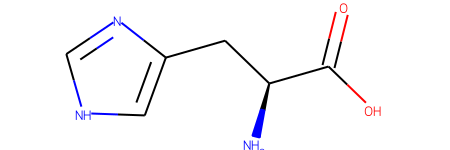

In [6]:
m

In [8]:
# vraci kanonickou formu smilesu defaultne
Chem.MolToSmiles(m)


'N[C@@H](Cc1c[nH]cn1)C(=O)O'

In [10]:
print(Chem.MolToMolBlock(m))
#prvni cast - koordinaty atomu
#druha cast tabulka konektivity


     RDKit          2D

 11 11  0  0  0  0  0  0  0  0999 V2000
    1.2760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943   -1.2135    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8578    2.6401    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3250    2.9520    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7886    4.3786    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7849    5.4933    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.2558    4.6904    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.3287    1.8373    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  2  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  2  0
  8 10  1  0
  7 11  1  1
  5  1  1  0
M  END



In [11]:
ri = m.GetRingInfo()

In [12]:
ri.AtomRings()

((0, 1, 2, 3, 4),)

In [15]:
Chem.GetSSSR(m)

1

In [35]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs=[molekula for molekula in suppl if molekula!=None]
#print(Chem.GetSSSR(molekula))

RDKit ERROR: [13:28:44] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [13:39:34] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:39:34] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [13:39:34] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [13:39:34] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [13:39:34] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:39:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:39:34] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [13:39:34] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:39:35] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [13:39:35] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [13:39:35] ERROR: Explicit v

In [36]:
print(drugs[666])
print(len(drugs))
Chem.GetSSSR(drugs[1245])

7113


4

In [37]:
len([d for d in drugs if d==None])

0

In [43]:
pocet_kruhu = 0
for d in drugs:
    pocet_kruhu += Chem.GetSSSR(d)
print(pocet_kruhu)

17547


In [41]:
rings = [Chem.GetSSSR(drug) for drug in drugs]

In [42]:
#zip iteruje objektem (co ma next), az jeden vycerpa tak skonci
[(m,r) for m,r in zip(drugs, rings[:10])]

[(<rdkit.Chem.rdchem.Mol at 0x7f4f55550260>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f555508f0>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f555af260>, 4),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f555af440>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f555afee0>, 1),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f55ca3f80>, 4),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f55bc90d0>, 5),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f558671c0>, 1),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f558675d0>, 12),
 (<rdkit.Chem.rdchem.Mol at 0x7f4f55d908a0>, 3)]

In [44]:
sum(rings)

17547